# import required liberaries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter("ignore")

# load dataset

In [35]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# let's check dimension of data set and set target 

In [36]:
print(f"dimension od dataset:{df.shape}")
print(f"total target with 1 and 0:{df.groupby('Outcome').size()}")

dimension od dataset:(768, 9)
total target with 1 and 0:Outcome
0    500
1    268
dtype: int64


In [37]:
df_target=df['Outcome']
df=df.drop('Outcome',axis=1)

 # let's use K-nearest neighors algorithms
 
 K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well

In [38]:
x_train,x_test,y_train,y_test=train_test_split(df,df_target,stratify=df_target,random_state=66)

In [39]:
train_acc=[]
test_acc=[]
range_nbr=range(1,11)
for nbr in range_nbr:
    #build the model
    knn=KNeighborsClassifier(n_neighbors=nbr)
    knn.fit(x_train,y_train)
    
    #append into train accouracy
    train_acc.append(knn.score(x_train,y_train))
    
    #append into test accouracy
    test_acc.append(knn.score(x_test,y_test))
    


# lets plot our accuracy

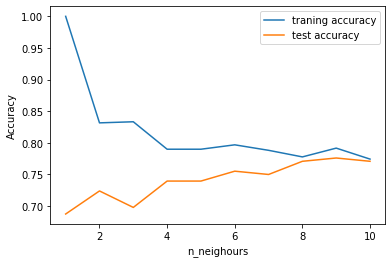

In [40]:
plt.plot(range_nbr,train_acc,label="traning accuracy")
plt.plot(range_nbr,test_acc,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighours")
plt.legend()
plt.savefig("knn_comapre_model")



The above plot shows the training and test set accuracy on the y-axis 
against the setting of n_neighbors on the x-axis. Considering 
if we choose one single nearest neighbor, the prediction on the training set is perfect. 
But when more neighbors are considered, the training accuracy drops, indicating that 
using the single nearest neighbor leads to a model that is too complex.
The best performance is somewhere around 9 neighbors.

The plot suggests that we should choose n_neighbors=9. Here we are:

In [41]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn_train_accuracy=(knn.score(x_train,y_train)*100)
knn_test_accuracy=(knn.score(x_test,y_test)*100)
print(f'Accuracy of K-NN  Classfication  on traning set: {knn_train_accuracy:.2f}')
print(f'Accuracy of K-NN  Classfication  on test set: {knn_test_accuracy:.2f}')

Accuracy of K-NN  Classfication  on traning set: 79.17
Accuracy of K-NN  Classfication  on test set: 77.60


# Logistic regression
Logistic Regression is one of the most common classification algorithms.

In [43]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
log_train=(logreg.score(x_train,y_train)*100)
log_test=(logreg.score(x_test,y_test)*100)
print(f"traning set score:{log_train:.2f} ")
print(f"test set score:{log_test:.2f} ")


traning set score:78.12 
test set score:77.08 


# Decision Tree


In [44]:
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(x_train,y_train)
tree_train=dtree.score(x_train,y_train)*100
tree_test=dtree.score(x_test,y_test)*100
print(f"traning set score:{tree_train:.2f} ")
print(f"test set score:{tree_test:.2f} ")


traning set score:100.00 
test set score:71.35 


The accuracy on the training set is 100% while the test set accuracy is much worse./nThis is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.
#### We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [45]:
dtree=DecisionTreeClassifier(random_state=0,max_depth=3)
dtree.fit(x_train,y_train)
tree_train=dtree.score(x_train,y_train)*100
tree_test=dtree.score(x_test,y_test)*100
print(f"traning set score:{tree_train:.2f} ")
print(f"test set score:{tree_test:.2f} ")

traning set score:77.26 
test set score:73.96 


# Feature Importance in Decision Trees
Feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target”. The feature importances always sum to 1:

In [46]:
print(f"Feature importance {dtree.feature_importances_}")

Feature importance [0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


Then we can visualize the feature importances:


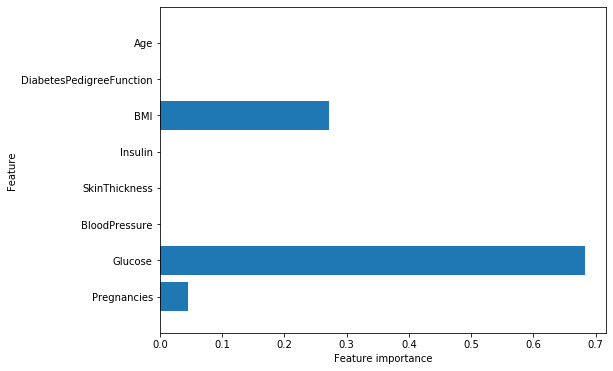

In [47]:
def plot_feature(model):
    plt.figure(figsize=(8,6))
    n_feature=8
    plt.barh(range(n_feature),model.feature_importances_,
                   align='center')
    plt.yticks(np.arange(n_feature),df)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_feature)
plot_feature(dtree)
plt.savefig("tree_feature")

# Ramdom Forest

Let’s apply a random forest consisting of 100 trees on the diabetes data set:

In [48]:
rforest=RandomForestClassifier(n_estimators=100,random_state=0)
rforest.fit(x_train,y_train)
rf_train=rforest.score(x_train,y_train)*100
rf_test=rforest.score(x_test,y_test)*100
print(f"Accuracy on traning set: {rf_train:.2f}")
print(f"Accuracy on test set: {rf_test:.2f}")


Accuracy on traning set: 100.00
Accuracy on test set: 78.65


The random forest gives us an accuracy of 78.6%, better than the logistic regression model or a single decision tree, without tuning any parameters. However, we can adjust the max_features setting, to see whether the result can be improved.

In [62]:
rforest1=RandomForestClassifier(n_estimators=100,random_state=0,max_depth=3)
rforest1.fit(x_train,y_train)
rf1_train=rforest1.score(x_train,y_train)*100
rf1_test=rforest1.score(x_test,y_test)*100
print(f"Accuracy on traning set: {rf1_train:.2f}")
print(f"Accuracy on test set: {rf1_test:.2f}")

Accuracy on traning set: 80.03
Accuracy on test set: 75.52


In [63]:
rforest3=RandomForestClassifier(n_estimators=1000,random_state=0,max_depth=3)
rforest3.fit(x_train,y_train)
rf3_train=rforest3.score(x_train,y_train)*100
rf3_test=rforest3.score(x_test,y_test)*100
print(f"Accuracy on traning set: {rf3_train:.2f}")
print(f"Accuracy on test set: {rf3_test:.2f}")

Accuracy on traning set: 79.86
Accuracy on test set: 74.48


# Feature importance in Random Forest

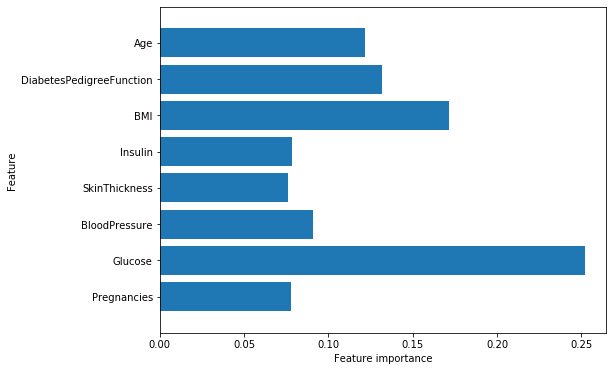

In [51]:

plot_feature(rforest)

Similarly to the single decision tree, the random forest also gives a lot of importance to the “Glucose” feature, but it also chooses “BMI” to be the 2nd most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

# Gradient boosting
is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [52]:
gb=GradientBoostingClassifier(random_state=0)
gb.fit(x_train,y_train)
gb_train=gb.score(x_train,y_train)*100
gb_test=gb.score(x_test,y_test)*100
print(f"Accuracy on traning set: {gb_train:.2f}")
print(f"Accuracy on test set: {gb_test:.2f}")


Accuracy on traning set: 91.67
Accuracy on test set: 79.17


It seems to be overfitting ,to reduce overfitting we try max depth=1 or lowr the learning rate


In [64]:
gb1=GradientBoostingClassifier(random_state=0,max_depth=1)
gb1.fit(x_train,y_train)
gb1_train=gb1.score(x_train,y_train)*100
gb1_test=gb1.score(x_test,y_test)*100
print(f"Accuracy on traning set: {gb1_train:.2f}")
print(f"Accuracy on test set: {gb1_test:.2f}")

Accuracy on traning set: 80.38
Accuracy on test set: 78.12


In [65]:
gb2=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gb2.fit(x_train,y_train)
gb2_train=gb2.score(x_train,y_train)*100
gb2_test=gb2.score(x_test,y_test)*100
print(f"Accuracy on traning set: {gb2_train:.2f}")
print(f"Accuracy on test set: {gb2_test:.2f}")

Accuracy on traning set: 80.21
Accuracy on test set: 77.60


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. However, in this case, none of these methods increased the generalization performance of the test set.
We can visualize the feature importances to get more insight into our model even though we are not really happy with the model:

# Feature importance in # Gradient boosting

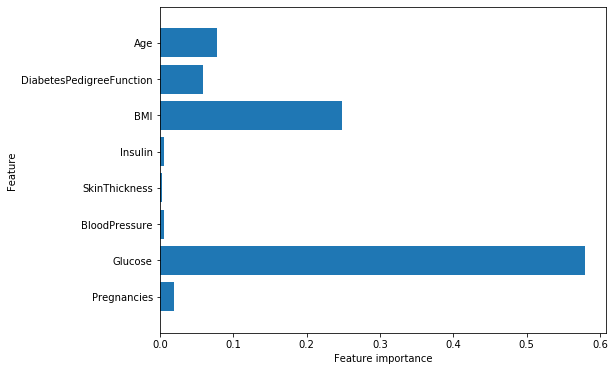

In [55]:
plot_feature(gb1)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, it gives weight to all of the features in this case.

# support vector machine

In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [56]:
svc=SVC()
svc.fit(x_train,y_train)
svc_train=svc.score(x_train,y_train)
svc_test=svc.score(x_test,y_test)
print(f"Accuracy on traning set: {svc_train:.2f}")
print(f"Accuracy on test set: {svc_test:.2f}")

Accuracy on traning set: 1.00
Accuracy on test set: 0.65


The model overfits quite substantially, with a perfect score on the training set and only 65% accuracy on the test set.

then we scale the data to overcome to this problem

In [26]:
scaler=MinMaxScaler()


In [57]:
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

svc=SVC()
svc.fit(x_train_scaler,y_train)
svc_train=svc.score(x_train_scaler,y_train)*100
svc_test=svc.score(x_test_scaler,y_test)*100
print(f"Accuracy on traning set:{svc_train:.2f}")
print(f"Accuracy on test set:{svc_test:.2f}")

Accuracy on traning set:76.91
Accuracy on test set:77.08


Scaling the data made a huge difference! Now we are actually underfitting, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [58]:
svc=SVC(C=1000)
svc.fit(x_train_scaler,y_train)
svc_train=svc.score(x_train_scaler,y_train)*100
svc_test=svc.score(x_test_scaler,y_test)*100
print(f"Accuracy on traning set:{svc_train:.2f}")
print(f"Accuracy on test set:{svc_test:.2f}")

Accuracy on traning set:78.99
Accuracy on test set:79.69


Here, increasing C allows us to improve the model, resulting in 79.7% test set accuracy.

# summary

In [72]:
model_name=['KNN','LOGISTIC','DECISION TREE','RANDOM FOREST','GRADIANT BOOSTING','SVC']
train_accuracy=[knn_train_accuracy,log_train,tree_train,rf1_train,gb2_train,svc_train]
test_accuracy=[knn_test_accuracy,log_test,tree_test,rf1_test,gb2_test,svc_test]


In [73]:
evaluation=pd.DataFrame({'train_accuracy':train_accuracy,'test_accuracy':test_accuracy},index=model_name)

In [74]:
evaluation

,train_accuracy,test_accuracy
KNN,79.166667,77.604167
LOGISTIC,78.125000,77.083333
DECISION TREE,77.256944,73.958333
RANDOM FOREST,80.034722,75.520833
GRADIANT BOOSTING,80.208333,77.604167
SVC,78.993056,79.687500
